In [2]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('Stock News Dataset.csv', encoding = 'ISO-8859-1')

In [8]:
df

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,...,German lawyers to probe Erdogan over alleged w...,"Boris Johnson says the UK will continue to ""in...",Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by Franc

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4101 non-null   object
 1   Label   4101 non-null   int64 
 2   Top1    4101 non-null   object
 3   Top2    4101 non-null   object
 4   Top3    4101 non-null   object
 5   Top4    4101 non-null   object
 6   Top5    4101 non-null   object
 7   Top6    4101 non-null   object
 8   Top7    4101 non-null   object
 9   Top8    4101 non-null   object
 10  Top9    4101 non-null   object
 11  Top10   4101 non-null   object
 12  Top11   4101 non-null   object
 13  Top12   4101 non-null   object
 14  Top13   4101 non-null   object
 15  Top14   4101 non-null   object
 16  Top15   4101 non-null   object
 17  Top16   4101 non-null   object
 18  Top17   4101 non-null   object
 19  Top18   4101 non-null   object
 20  Top19   4101 non-null   object
 21  Top20   4101 non-null   object
 22  Top21   4101 non-null   

In [14]:
df.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

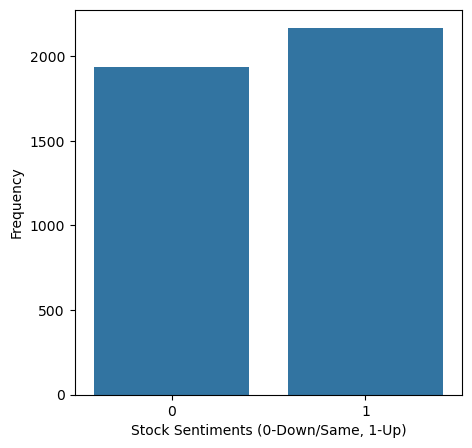

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(x='Label', data=df)
plt.xlabel('Stock Sentiments (0-Down/Same, 1-Up)')
plt.ylabel('Frequency')
plt.show()

Data-Preprocessing

In [27]:
df.isna().any()

Date     False
Label    False
Top1     False
Top2     False
Top3     False
Top4     False
Top5     False
Top6     False
Top7     False
Top8     False
Top9     False
Top10    False
Top11    False
Top12    False
Top13    False
Top14    False
Top15    False
Top16    False
Top17    False
Top18    False
Top19    False
Top20    False
Top21    False
Top22    False
Top23     True
Top24     True
Top25     True
dtype: bool

In [29]:
df.dropna(inplace=True)
print(df.shape)

(4098, 27)


In [31]:
df_copy = df.copy()

In [33]:
df_copy.reset_index(inplace=True)

In [35]:
# Splitting the dataset into train an test set
train = df_copy[df_copy['Date'] < '20150101']
test = df_copy[df_copy['Date'] > '20141231']
print('Train size: {}, Test size: {}'.format(train.shape, test.shape))

Train size: (3972, 28), Test size: (378, 28)


In [37]:
# Splitting the dataset
y_train = train['Label']
train = train.iloc[:, 3:28]
y_test = test['Label']
test = test.iloc[:, 3:28]

In [39]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sachi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
# Removing punctuation and special character from the text
train.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)
test.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)

In [43]:
# Renaming columns
new_columns = [str(i) for i in range(0,25)]
train.columns = new_columns
test.columns = new_columns

In [45]:
# Converting the entire text to lower case
for i in new_columns:
  train[i] = train[i].str.lower()
  test[i] = test[i].str.lower()

In [47]:
# Joining all the columns
train_headlines = []
test_headlines = []

for row in range(0, train.shape[0]):
  train_headlines.append(' '.join(str(x) for x in train.iloc[row, 0:25]))

for row in range(0, test.shape[0]):
  test_headlines.append(' '.join(str(x) for x in test.iloc[row, 0:25]))

In [49]:
train_headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [51]:
# Creating corpus of train dataset
ps = PorterStemmer()
train_corpus = []

for i in range(0, len(train_headlines)):

  # Tokenizing the news-title by words
  words = train_headlines[i].split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  headline = ' '.join(words)

  # Building a corpus of news-title
  train_corpus.append(headline)

In [52]:
# Creating corpus of test dataset
test_corpus = []

for i in range(0, len(test_headlines)):

  # Tokenizing the news-title by words
  words = test_headlines[i].split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  headline = ' '.join(words)

  # Building a corpus of news-title
  test_corpus.append(headline)

In [53]:
down_words = []
for i in list(y_train[y_train==0].index):
  down_words.append(train_corpus[i])

up_words = []
for i in list(y_train[y_train==1].index):
  up_words.append(train_corpus[i])

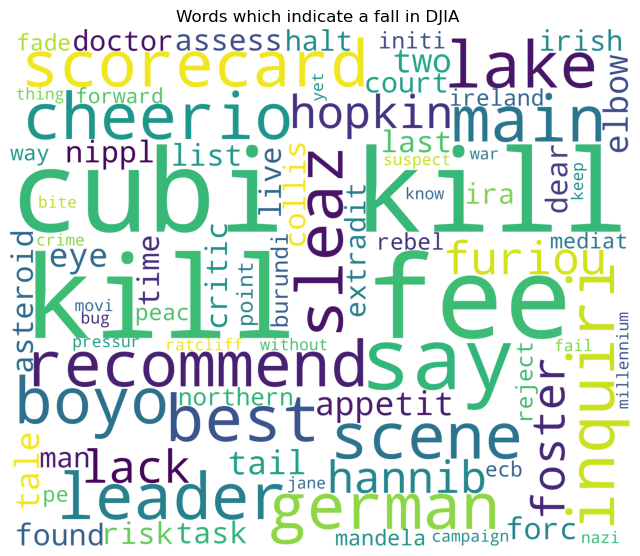

In [54]:
# Creating wordcloud for down_words
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(down_words[1])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate a fall in DJIA ")
plt.show()

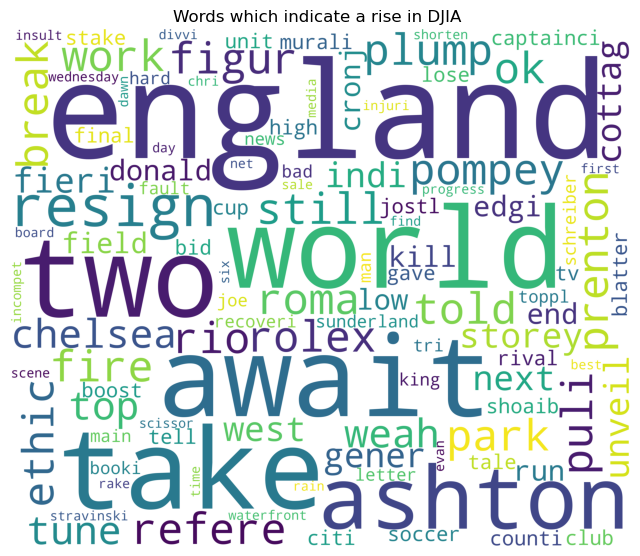

In [55]:
# Creating wordcloud for up_words
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(up_words[5])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate a rise in DJIA ")
plt.show()

In [56]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(2,2))
X_train = cv.fit_transform(train_corpus).toarray()

In [57]:
X_test = cv.transform(test_corpus).toarray()

Model-training

In [59]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
lr_y_pred = lr_classifier.predict(X_test)

In [60]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 85.98%
Precision score is: 0.87
Recall score is: 0.85


In [70]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)

In [72]:
lr_cm

array([[162,  24],
       [ 29, 163]], dtype=int64)

In [76]:
#rf model testing
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [77]:
rf_y_pred = rf_classifier.predict(X_test)

In [78]:
# Accuracy, Precision and Recall
score1 = accuracy_score(y_test, rf_y_pred)
score2 = precision_score(y_test, rf_y_pred)
score3 = recall_score(y_test, rf_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 84.92%
Precision score is: 0.84
Recall score is: 0.88


In [80]:
# Making the Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_cm

array([[153,  33],
       [ 24, 168]], dtype=int64)